Now that you implemented your first example of probabilistic computations, here is your homework:

Write a python function that simulates the number of people present in an office when the n employees work from home 3 days a week and in the office 2 days.
In particular, the results should be:

### **1. Distribution of # employees in the office on a random day**
For each simulated week:

Each of nnn employees randomly selects 2 distinct office days (from 5).

For each day, count how many employees chose that day.

Aggregate across simulations to approximate the distribution.

Plot a histogram

In [ ]:
#Each of nnn employees randomly selects 2 distinct office days (from 5).
#Generate for each employee radnomly 2 days in range Mo-Fr. Days should not be same
import numpy as np
import matplotlib.pyplot as plt

from numpy.random import default_rng
rng = default_rng(1)
nnn = 10

someEmptiness = np.zeros((nnn,2), dtype=int)

for i in range(nnn):
  someEmptiness[i] = np.random.choice([1,2,3,4,5], replace=False, size=2)

print(someEmptiness)


[[3 2]
 [4 1]
 [4 1]
 [4 1]
 [3 4]
 [1 5]
 [4 5]
 [4 3]
 [1 3]
 [4 5]]


In [ ]:
#For each day, count how many employees chose that day

counts = np.unique(someEmptiness,return_counts=True)
for i in range(len(counts[0])):
    print(counts[0][i],counts[1][i])

1 5
2 1
3 4
4 7
5 3


In [ ]:
#Aggregate across simulations to approximate the distribution

import numpy as np

def WeekSimulation(nnn):
    someEmptiness = np.zeros((nnn, 2), dtype=int)
    for i in range(nnn):
        someEmptiness[i] = np.random.choice([1, 2, 3, 4, 5], replace=False, size=2)
    # для фиксированного массива частот (для значений 1-5)
    counts = np.arange(0,5,1)
    unique_values, counts = np.unique(someEmptiness, return_counts=True)
    print("Current value: ", counts)
    return counts

# Тест: Создаем пустой массив
WeekDaysStats = np.zeros(5, dtype=int)
numOfWeeks = 10

for i in range(numOfWeeks):
    WeekDaysStats += WeekSimulation(10)  # Добавляем в WeekDaysStats статистику новой недели
    print("Sum after latest iteration: ", WeekDaysStats)

print("Final sum of chosen days during numOfWeeks:", WeekDaysStats)

Current value:  [3 1 3 9 4]
Sum after latest iteration:  [3 1 3 9 4]
Current value:  [4 3 6 3 4]
Sum after latest iteration:  [ 7  4  9 12  8]
Current value:  [3 8 5 4]


ValueError: operands could not be broadcast together with shapes (5,) (4,) (5,) 

In [12]:
import numpy as np

def WeekSimulation(nnn):
    someEmptiness = np.zeros((nnn, 2), dtype=int)
    for i in range(nnn):
        someEmptiness[i] = np.random.choice([1, 2, 3, 4, 5], replace=False, size=2)

    # Используем bincount для фиксированного массива частот (для значений 1-5)
    flattened = someEmptiness.flatten()
    counts = np.bincount(flattened - 1, minlength=5)  # -1, чтобы индексы начинались с 0
    return counts

# Тест: симулируем недели и накапливаем сумму
test = np.zeros(5, dtype=int)

for i in range(10):
    sim_counts = WeekSimulation(10)
    test += sim_counts  # Накапливаем сумму

print("Final sum of all weeks:", test)

Final sum of all weeks: [44 47 37 35 37]


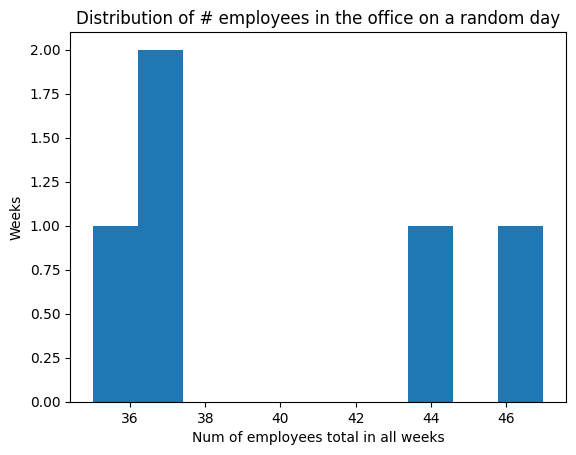

In [15]:
import matplotlib.pyplot as plt
plt.hist(test)

plt.title('Distribution of # employees in the office on a random day')
plt.xlabel('Num of employees total in all weeks')
plt.ylabel('Weeks')
plt.show()

**#2. Probability that two particular employees overlap ≥ 2 days**

For each simulated week:

Simulate their two chosen office days.

Count the overlap between them.

Record whether overlap ≥ 2.